#**READ THE DATA**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zepto DS/flipkart_com-ecommerce_sample.csv')
print(df.iloc[0])
print(df.columns.tolist())

uniq_id                                     c2d766ca982eca8304150849735ffef9
crawl_timestamp                                    2016-03-25 22:59:23 +0000
product_url                http://www.flipkart.com/alisha-solid-women-s-c...
product_name                             Alisha Solid Women's Cycling Shorts
product_category_tree      ["Clothing >> Women's Clothing >> Lingerie, Sl...
pid                                                         SRTEH2FF9KEDEFGF
retail_price                                                           999.0
discounted_price                                                       379.0
image                      ["http://img5a.flixcart.com/image/short/u/4/a/...
is_FK_Advantage_product                                                False
description                Key Features of Alisha Solid Women's Cycling S...
product_rating                                           No rating available
overall_rating                                           No rating available

In [ ]:

print(df.shape)


(20002, 15)


#**MISSING VALUE IMPUTATION**

In [ ]:

print(df.isnull().sum())


uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64


#DROP Rows with missing id's

In [ ]:

df = df.dropna(subset=['uniq_id', 'pid'])
print(df.isnull().sum())


uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64


#Fill prices with mean value

In [ ]:
# Calculate overall means as fallback values
overall_mean_retail_price = df['retail_price'].mean()
overall_mean_discounted_price = df['discounted_price'].mean()

# Impute missing values with fallback values if group means are NaN
df['retail_price'] = df['retail_price'].fillna(df['retail_price']).fillna(overall_mean_retail_price)
df['discounted_price'] = df['discounted_price'].fillna(df['discounted_price']).fillna(overall_mean_discounted_price)

# Drop the temporary mean columns
#df.drop(columns=['retail_price_mean', 'discounted_price_mean'], inplace=True)

# Verify the imputation
missing_values_after_imputation = df[['retail_price', 'discounted_price']].isnull().sum()
print(missing_values_after_imputation)


retail_price        0
discounted_price    0
dtype: int64


<ipython-input-53-a062a0eabbed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['retail_price'] = df['retail_price'].fillna(df['retail_price']).fillna(overall_mean_retail_price)
<ipython-input-53-a062a0eabbed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discounted_price'] = df['discounted_price'].fillna(df['discounted_price']).fillna(overall_mean_discounted_price)


#Fill the brand with mode of brands with same pid

In [ ]:
import pandas as pd

# Create a mapping of `pid` to the most frequent `brand`
brand_mapping = df.groupby('pid')['brand'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

# Merge this mapping with the original DataFrame
df = df.merge(brand_mapping.rename('imputed_brand'), on='pid', how='left')

# Impute missing `brand` values with the imputed brand
df['brand'] = df['brand'].fillna(df['imputed_brand'])

# Drop the temporary column
df.drop(columns=['imputed_brand'], inplace=True)


missing_values_after_imputation = df['brand'].isnull().sum()
print(f"Missing values in 'brand' after final imputation: {missing_values_after_imputation}")


Missing values in 'brand' after final imputation: 0


In [ ]:
import pandas as pd



# Create a mapping of `pid` to the most frequent `product_specifications`
specifications_mapping = df.groupby('pid')['product_specifications'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
)

# Merge this mapping with the original DataFrame
df = df.merge(specifications_mapping.rename('imputed_product_specifications'), on='pid', how='left')

# Impute missing `product_specifications` values with the imputed specifications
df['product_specifications'] = df['product_specifications'].fillna(df['imputed_product_specifications'])

# Drop the temporary column
df.drop(columns=['imputed_product_specifications'], inplace=True)

missing_values_after_imputation = df['product_specifications'].isnull().sum()
print(f"Missing values in 'product_specifications' after final imputation: {missing_values_after_imputation}")


Missing values in 'product_specifications' after final imputation: 0


In [ ]:
df.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,0
discounted_price,0
image,3
is_FK_Advantage_product,0


In [ ]:

df = df.dropna()
print(df.isnull().sum())


uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64


#Exploring BRANDS

In [ ]:

print(df['brand'].nunique())


3500


In [ ]:

print(df['brand'].value_counts())

brand
Unknown                5860
Allure Auto             469
Regular                 313
Voylla                  299
Slim                    288
                       ... 
Hariom enterprises        1
PerfectBlue               1
morpankh Enterprise       1
Lakiya                    1
Fun To See                1
Name: count, Length: 3500, dtype: int64


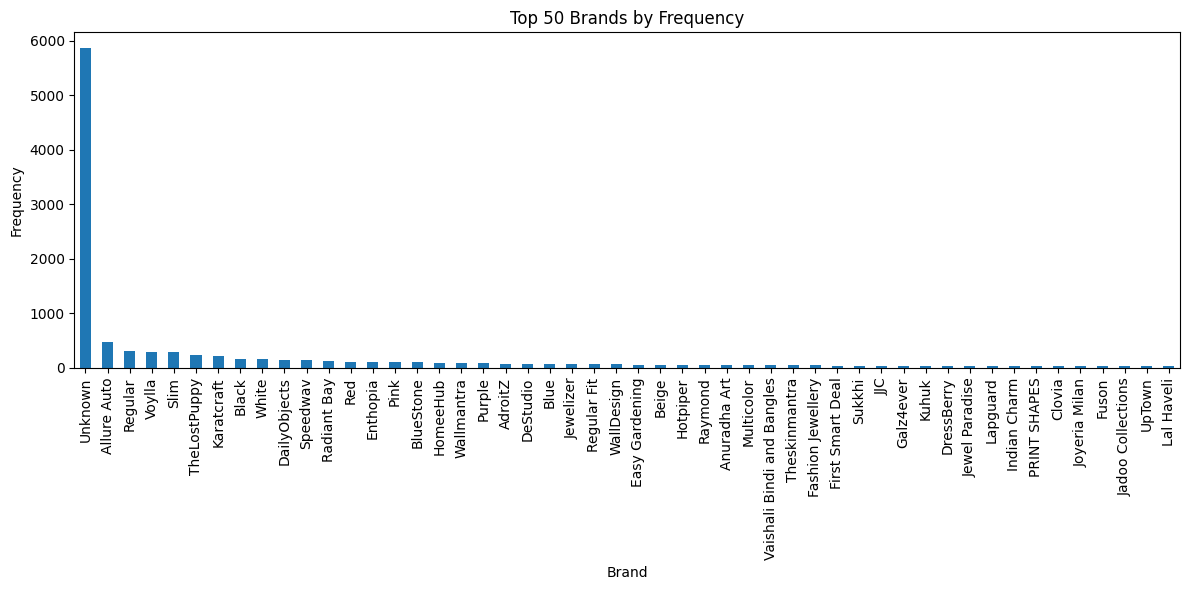

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'brand' is the column with brand names
top_50_brands = df['brand'].value_counts().nlargest(50)

plt.figure(figsize=(12, 6))
top_50_brands.plot(kind='bar')
plt.title('Top 50 Brands by Frequency')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


#Exploring Prices

In [ ]:

import pandas as pd

# Assuming 'df' is your DataFrame and 'retail_price' is the column with retail prices
mean_retail_price = df['retail_price'].mean()
median_retail_price = df['retail_price'].median()

print("Mean Retail Price:", mean_retail_price)
print("Median Retail Price:", median_retail_price)


Mean Retail Price: 2979.7336872266455
Median Retail Price: 1049.0


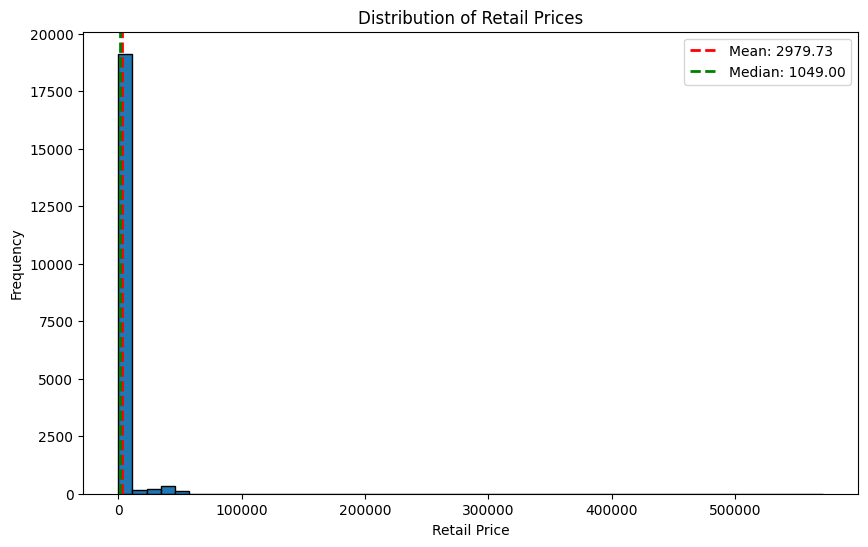

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Handle potential non-numeric values in 'retail_price'
df['retail_price'] = pd.to_numeric(df['retail_price'], errors='coerce')

# Calculate mean and median
mean_price = df['retail_price'].mean()
median_price = df['retail_price'].median()

# Plot the distribution of retail prices
plt.figure(figsize=(10, 6))
plt.hist(df['retail_price'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Retail Prices')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')

plt.legend()
plt.show()


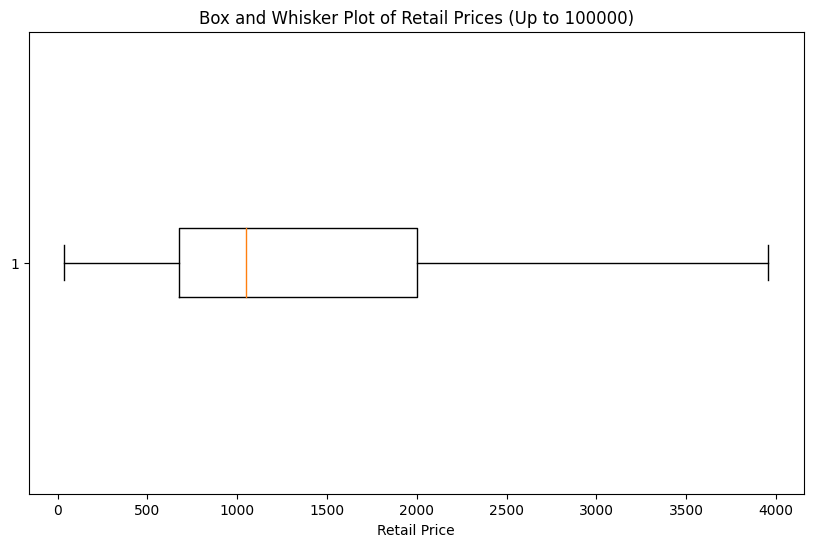

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'retail_price' is the column with retail prices
plt.figure(figsize=(10, 6))
# Filter prices and plot the boxplot without outliers
plt.boxplot(df['retail_price'][df['retail_price'] <= 100000], vert=False, sym='')
plt.title('Box and Whisker Plot of Retail Prices (Up to 100000)')
plt.xlabel('Retail Price')
plt.show()

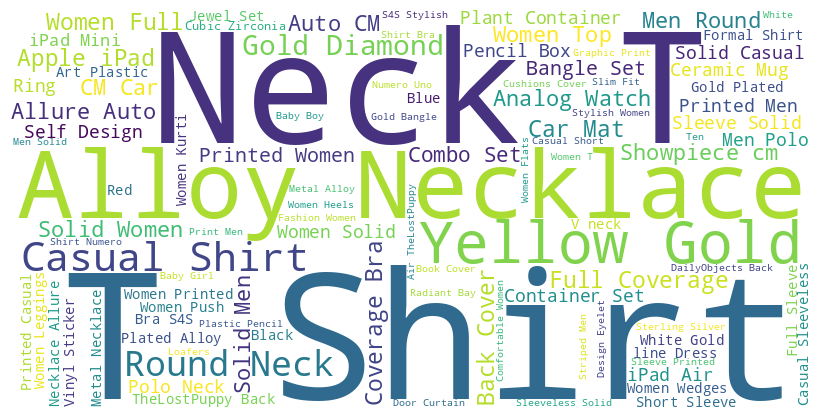

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['product_name'].astype(str).tolist())


stopwords = set(STOPWORDS)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10,
                      max_words=10000).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


#Exploring Product Category Tree

top_level_category
Clothing                                               6197
Jewellery                                              3531
Footwear                                               1227
Mobiles & Accessories                                  1099
Automotive                                             1012
Home Decor & Festive Needs                              929
Beauty and Personal Care                                710
Home Furnishing                                         699
Kitchen & Dining                                        647
Computers                                               578
Watches                                                 527
Baby Care                                               483
Tools & Hardware                                        391
Toys & School Supplies                                  330
Pens & Stationery                                       313
Bags, Wallets & Belts                                   265
Furniture            

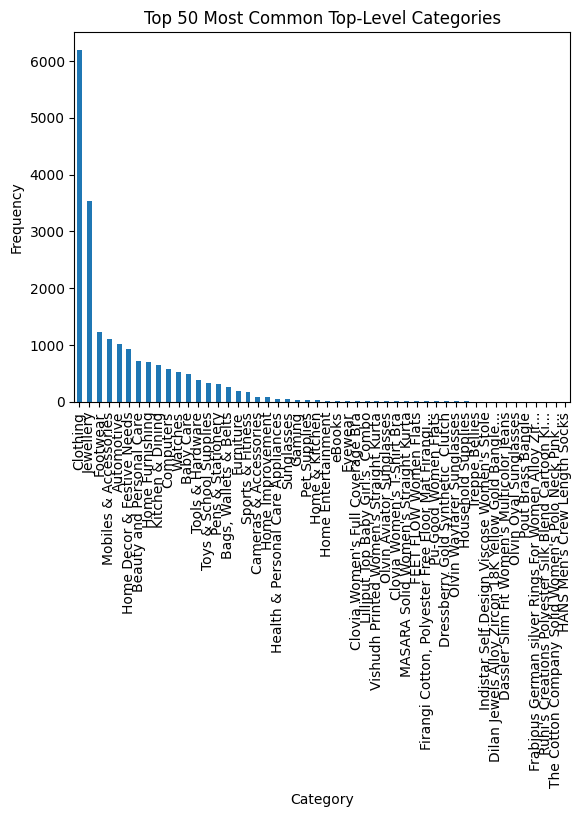

In [ ]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt

def parse_category_tree(category_tree):
    try:
        categories = ast.literal_eval(category_tree)
        return categories[0].split(' >> ')
    except:
        return []

# Apply the parsing function to the product_category_tree column
df['parsed_category_tree'] = df['product_category_tree'].apply(parse_category_tree)

# Extract the top-level categories
df['top_level_category'] = df['parsed_category_tree'].apply(lambda x: x[0] if len(x) > 0 else None)

# Count the frequency of top-level categories
top_level_category_counts = df['top_level_category'].value_counts()

# Display the top 10 most common top-level categories
print(top_level_category_counts.head(50))

# Plot the top 10 most common top-level categories
top_level_category_counts.head(50).plot(kind='bar')
plt.title('Top 50 Most Common Top-Level Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/zepto DS/processed.csv', index=False)

In [ ]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,parsed_category_tree,top_level_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","[Clothing, Women's Clothing, Lingerie, Sleep &...",Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...","[Furniture, Living Room Furniture, Sofa Beds &...",Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...","[Footwear, Women's Footwear, Ballerinas, AW Be...",Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","[Clothing, Women's Clothing, Lingerie, Sleep &...",Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...","[Pet Supplies, Grooming, Skin & Coat Care, Sha...",Pet Supplies


In [ ]:
# prompt: print first row and all columns

print(df.iloc[0])
print(df.columns.tolist())


uniq_id                                     c2d766ca982eca8304150849735ffef9
crawl_timestamp                                    2016-03-25 22:59:23 +0000
product_url                http://www.flipkart.com/alisha-solid-women-s-c...
product_name                             Alisha Solid Women's Cycling Shorts
product_category_tree      ["Clothing >> Women's Clothing >> Lingerie, Sl...
pid                                                         SRTEH2FF9KEDEFGF
retail_price                                                           999.0
discounted_price                                                       379.0
image                      ["http://img5a.flixcart.com/image/short/u/4/a/...
is_FK_Advantage_product                                                False
description                Key Features of Alisha Solid Women's Cycling S...
product_rating                                           No rating available
overall_rating                                           No rating available

In [ ]:
# prompt: make a csv file with first 1000 rows with p_1000.csv

df_1000 = df.head(5)
df_1000.to_csv('p_5.csv', index=False)


In [ ]:
# prompt: show first 5 rows as txt format

!cat p_5.csv | head -5


uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,parsed_category_tree,top_level_category
c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-cycling-shorts/p/itmeh2ffvzetthbb?pid=SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts""]",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/altht-3p-21-alisha-38-original-imaeh2d5vm5zbtgg.jpeg"", ""http://img5a.flixcart.com/image/short/p/j/z/altght4p-26-alisha-38-original-imaeh2d5kbufss6n.jpeg"", ""http://img5a.flixcart.com/image/short/p/j/z/altght4p-26-alisha-38-original-imaeh2d5npdybzyt.jpeg"", ""http://img5a.flixcart.com/image/short/z/j/7/altght-7-alisha-38-original-imaeh2d5jsz2ghd

In [ ]:
df.head(5)